<a href="https://colab.research.google.com/github/jef278/Projects_analysis/blob/main/Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

def upload_image():
    uploaded = files.upload()
    for filename, content in uploaded.items():
        with open(filename, 'wb') as f:
            f.write(content)
    return filename

filename = upload_image()


Saving AFM1.jpg to AFM1.jpg


In [18]:
!pip install ipywidgets opencv-python-headless
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00


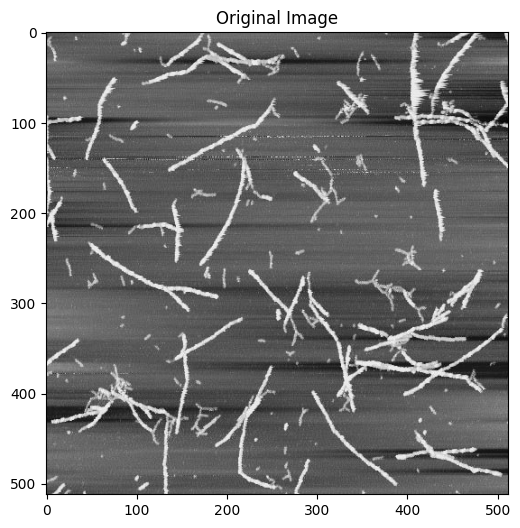

In [25]:
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()


In [26]:
#@title **Set Threshold Value**
threshold_value = 133  #@param {type:"slider", min:0, max:255}
print(f"Using threshold: {threshold_value}")


Using threshold: 133


In [27]:
# Apply binary thresholding
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Detect edges using Canny (with automatic hysteresis thresholds)
edges = cv2.Canny(binary_img, 50, 150)  # Lower/higher thresholds fixed

# Find contours of blobs
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


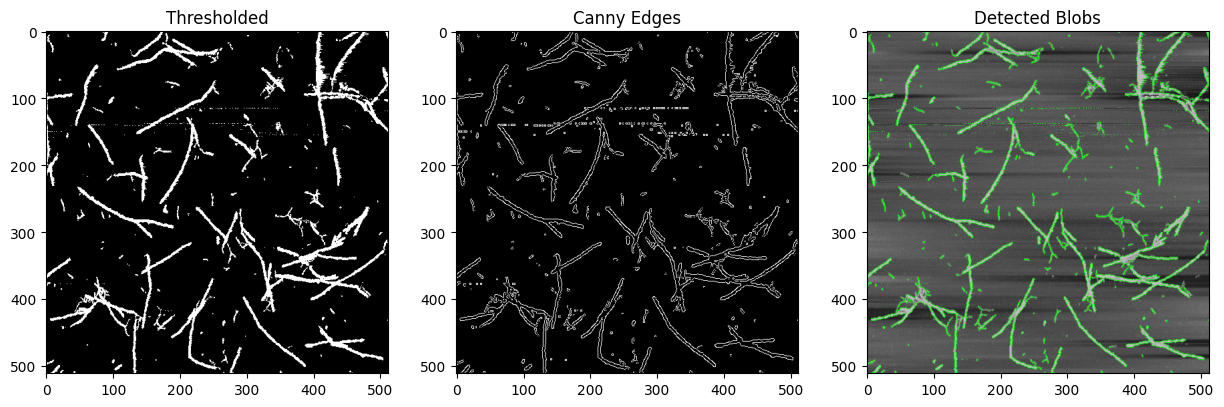

In [28]:
# Create result visualization
result_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result_img, contours, -1, (0,255,0), 1)  # Green contours

# Plot comparison
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(binary_img, cmap='gray'), plt.title('Thresholded')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(133), plt.imshow(result_img), plt.title('Detected Blobs')
plt.show()


In [29]:
def live_threshold(thresh):
    _, binary_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(8,6))
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Threshold: {thresh}')
    plt.axis('off')
    plt.show()


In [30]:
interact(live_threshold, thresh=IntSlider(min=0, max=255, step=1, value=128))


interactive(children=(IntSlider(value=128, description='thresh', max=255), Output()), _dom_classes=('widget-in…

<function __main__.live_threshold(thresh)>